# Descriptive Analytics

# Packages

In [ ]:
# ! pip3 install pandas
# ! pip3 install lifelines
# ! pip install matplotlib

In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt

# Introduction

In suvival analysis the outcome is made of two variables, time and event. Sometimes such problems are broken down to sub-optimal problems such as regression on time or classification on event. 

Since the outcome has two variables, plotting the outcome is either via survival or hazard functions. 


- In descriptive analytics, we focus on visualising the outcome y(time, event) 
- In predictive analytics, we predict the outcome y(time, evenet) given the features x. 
- In prescriptive analytics, what shoudl we do 

# Survival function

The survival function $S(t)$, is defined as the probability that an event-of-interest occurs after a certain time $t$. 
$$
S(t) = P(T > t)
$$
where $T$ is the time at which the event occurs. 

**No Censoring**: If there are no censored observations, the most natural estimator for survival is the empirical estimator

$$
\hat S(t) = \frac{1}{n} \sum_{i=0}^n I(t_i > t)
$$

which is the proportion of the events observed after time $t$. 

**Censoring**: In presence of censoring, Kaplan and Meier (1958) proposed a nonparametric estimate of the survival function, which is the generalization of the empirical estimator for censored data


$$
\hat S(t) = \prod_{t_i<t} (1 - \frac{d_i}{n_i} )
$$


Where $t_i$ is the observed event times, $d_i$ and $n_i$ are the number of events and subjects at risk at time $t_i$.




# Examples

## Example 1: KM curve with no censoring 
Consider the life of 10 light bulbs until they burn out

In [16]:
data = {
    'T': [3, 4, 4, 6, 7, 7, 8, 10, 11, 13],
    'E': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ], # due to no censoring, all events are 1 
}

df = pd.DataFrame(data)
df

,T,E
0,3,1
1,4,1
2,4,1
3,6,1
4,7,1
5,7,1
6,8,1
7,10,1
8,11,1
9,13,1


Text(0, 0.5, 'Survival Probability')

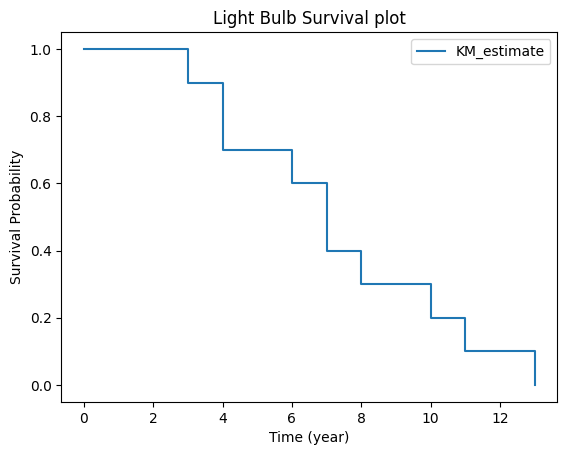

In [19]:
# Create KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=df['T'], event_observed=df['E'])

# Plot the curve 
kmf.plot(ci_show=False)
plt.title('Light Bulb Survival plot')
plt.xlabel('Time (year)')
plt.ylabel('Survival Probability')

Interpretation: The probability that a light bulb survives longer than 8 year is 30%

Given 10 samples and no censoring, at every event occurence the curve drops 1/10. The underlying survival_function_ method confirms this.   


In [11]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.0
3.0,0.9
4.0,0.7
6.0,0.6
7.0,0.4
8.0,0.3
10.0,0.2
11.0,0.1
13.0,0.0


## Example 2: KM curve with censoring 

Let's consider the same example with 10 light bulbs, where some of them are not yet burned out or we have lost track of thier status(right-censoring)

In [31]:
data = {
    'T': [3, 4, 4, 6, 7, 7, 8, 10, 11, 13],
    'E': [1, 1, 0, 1, 1, 0, 1, 1, 1, 0],
}

df = pd.DataFrame(data)

Text(0, 0.5, 'Survival Probability')

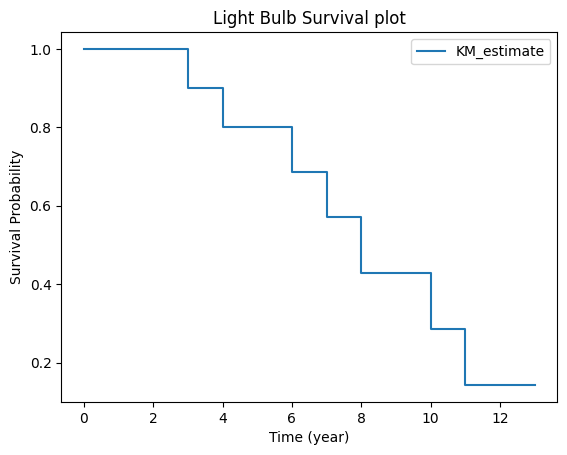

In [32]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df['T'], event_observed=df['E'])

kmf.plot(ci_show=False)
plt.title('Light Bulb Survival plot')
plt.xlabel('Time (year)')
plt.ylabel('Survival Probability')

In [33]:
kmf.survival_function_.reset_index()

,timeline,KM_estimate
0,0.0,1.000000
1,3.0,0.900000
2,4.0,0.800000
3,6.0,0.685714
4,7.0,0.571429
5,8.0,0.428571
6,10.0,0.285714
7,11.0,0.142857
8,13.0,0.142857


Let's see how the KM survival function S(t) is constructed from the KM curve table
t | d| c|n |S_i(t)| S(t) 
--|--|--|--|--|--|
0 | 0| 0|10|10/10 =1 | 1
3 | 1| 0|10|1-1/10 =9/10| 0.9
4 | 1| 1| 9|1-1/9 = 8/9 | 0.8
6 | 1| 0| 7|1-1/7 = 6/7 | 0.6857
7 | 1| 1| 6|1-1/6 = 5/6 | 0.5714
8 | 1| 0| 4|1-1/4 = 3/4 | 0.4285
10| 1| 0| 3|1-1/3 = 2/3 | 0.2857
11| 1| 0| 2|1-1/2 = 1/2 | 0.1428
13| 0| 1| 1|1-0/1 = 1   | 0.1428

## Example 3: Comparing Survival Curves:

Are these two curves statistivally equivalent. For answering it, we can use the log-rank test (Mantel 1966; Peto and Peto 1972). This is the most well-known and widely used method to test the null hypothesis of no difference in survival between two or more independent groups.

- One can compare 2 groups or more than 2 group of samples
- One can give different weight to early vs late failures
- 


Methods to 

### Example 3: Identifying Data Drift

## Example 4: Feature Selection

## Example 5: Detecting Data Bias 

# 

# Best practices for visualising Kaplan-Meier plots

In a recent survey from variaty of stakeholders in healthcares, suggested that the addition of summary tables and confidence intervals  greatly increased the effectiveness of Kaplan Meier plots
[article](https://pubmed.ncbi.nlm.nih.gov/31575572/)

# Challenging Scenarios
* Accounting for time-varying covariates
    * Low-frequency time-varying variables for example age, sex:
    * High-frequqncy time-varying variables for example stock price fluctuation 

* Controling for covariates: 
    * We already know that KM visualize the outcome. However, in causal inference scenarios we are interested in visualising the outcome between treatment and control groups where the distribution of the featues set are overlapping.   

# Summary & Take Aways

* If there are no censored observations and all subjects die KM-curve reaces zero, otherwise to the fraction of subjects that survived. 
* If the data for any subjects are censored, the bottom point on the survival curve will not equal the fraction of subjects that survived. [link for further reading](https://www.graphpad.com/support/faq/what-determines-how-low-a-kaplan-meier-survival-curve-ends-up-at-late-time-points/#:~:text=If%20there%20are%20no%20censored,the%20percent%20survival%20is%20zero.)

* If the survival curve goes all the way down tozero, that does not mean that every subject in the study died and some could be probably censored. 

# Advanced Topics

- How to handle time-series data?